In [158]:
import pickle
import os
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
import pandas as pd

In [159]:
path = './temp_more_algo'
pathList = os.listdir(path)

all_results = []
# 遍历列表中的文件名
for file in pathList:
    # 使用join函数对路径进行拼接，然后构成绝对路径
    if 'pkl' not in file:
        continue
    abs_path = os.path.join(path,file)
    print(abs_path)
    try:
        with open(abs_path, 'rb') as file:
            result = pickle.load(file)
        all_results.append(result)
    except Exception as e:
        traceback.print_exc()
    
    # print(result)

./temp_more_algo/debug_result_(28, 31, 1, 4).pkl
./temp_more_algo/debug_result_(19, 22, 1, 3).pkl
./temp_more_algo/debug_result_(49, 52, 3, 2).pkl
./temp_more_algo/debug_result_(6, 9, 3, 4).pkl
./temp_more_algo/debug_result_(49, 52, 4, 4).pkl
./temp_more_algo/debug_result_(40, 43, 4, 3).pkl
./temp_more_algo/debug_result_(10, 13, 4, 6).pkl
./temp_more_algo/debug_result_(10, 13, 4, 2).pkl
./temp_more_algo/debug_result_(49, 52, 3, 3).pkl
./temp_more_algo/debug_result_(46, 49, 1, 2).pkl
./temp_more_algo/debug_result_(28, 31, 2, 2).pkl
./temp_more_algo/debug_result_(34, 37, 4, 3).pkl
./temp_more_algo/debug_result_(13, 16, 1, 5).pkl
./temp_more_algo/debug_result_(6, 9, 1, 4).pkl
./temp_more_algo/debug_result_(22, 25, 2, 3).pkl
./temp_more_algo/debug_result_(31, 34, 1, 3).pkl
./temp_more_algo/debug_result_(13, 16, 3, 2).pkl
./temp_more_algo/debug_result_(31, 34, 3, 3).pkl
./temp_more_algo/debug_result_(9, 12, 4, 4).pkl
./temp_more_algo/debug_result_(43, 46, 3, 2).pkl
./temp_more_algo/debug_re

In [139]:
len(pathList), len(all_results)

(220, 220)

In [140]:
# result  = {
#     'key': key,
#     'alg2n_qubit2success_num': to_dict(alg2n_qubit2success_num),
#     'alg2n_qubit2bug_num': to_dict(alg2n_qubit2bug_num), 
#     'alg2n_qubit2error_num': to_dict(alg2n_qubit2error_num), 
#     'alg2n_qubit2identify_num': to_dict(alg2n_qubit2identify_num) 
# }

In [141]:
all_results[0]

{'key': (28, 31, 1, 4),
 'alg2n_qubit2success_num': {'hamiltonian_simulation': {28: 1, 30: 1},
  'qknn': {29: 1},
  'qsvm': {30: 1},
  'ising': {29: 1, 30: 1},
  'qft': {30: 1},
  'ghz': {28: 1, 29: 1, 30: 1},
  'qft_inverse': {29: 1},
  'qnn': {29: 1},
  'qugan': {29: 1},
  'deutsch_jozsa': {28: 1, 29: 1},
  'bernstein_vazirani': {29: 1},
  'multiplier': {30: 1},
  'qec_5_x': {30: 1}},
 'alg2n_qubit2bug_num': {'hamiltonian_simulation': {28: 1, 29: 1, 30: 1},
  'qknn': {28: 1, 29: 1, 30: 1},
  'qsvm': {28: 1, 29: 1, 30: 1},
  'vqc': {28: 1, 29: 1, 30: 1},
  'ising': {28: 1, 29: 1, 30: 1},
  'qft': {28: 1, 29: 1, 30: 1},
  'ghz': {28: 1, 29: 1, 30: 1},
  'qft_inverse': {28: 1, 29: 1, 30: 1},
  'swap': {29: 1},
  'qnn': {29: 1},
  'qugan': {29: 1},
  'simon': {28: 1, 30: 1},
  'deutsch_jozsa': {28: 1, 29: 1, 30: 1},
  'bernstein_vazirani': {28: 1, 29: 1, 30: 1},
  'multiplier': {30: 1},
  'qec_5_x': {30: 1}},
 'alg2n_qubit2error_num': {'hamiltonian_simulation': {29: 1, 30: 3},
  'qknn': 

In [160]:
qubit_step = 5
min_qubit, max_qubit  = 10, 49
bug_num_ranges = [
    (start, start + qubit_step)
    for start in range(min_qubit, max_qubit, qubit_step)
]

In [161]:
def findRange(value, qubit_ranges):
    for start, end in qubit_ranges:
        if value >= start and value < end:
            return (start, end)
    return None

In [162]:
alg2n_qubit2success_num = defaultdict(lambda: defaultdict(int))
alg2n_qubit2bug_num = defaultdict(lambda: defaultdict(int))

# alg_names = set()
# qubit_nums = set()
for result in all_results:
    min_qubit_num, max_qubit_num, bug_num, max_step = result['key']
    if max_step == 4:
        
        for alg_name, n_qubit2success_num in result['alg2n_qubit2success_num'].items():
            for n_qubit, success_num in n_qubit2success_num.items():
                # alg2n_qubit2success_num[alg_name][n_qubit] += success_num 
                alg2n_qubit2success_num[alg_name][findRange(n_qubit,bug_num_ranges)] += success_num 
                
            # alg_names.add(alg_name)
            # qubit_nums.add((min_qubit_num,max_qubit_num))

        for alg_name, n_qubit2bug_num in result['alg2n_qubit2bug_num'].items():
            for n_qubit, bug_num in n_qubit2bug_num.items():
                # alg2n_qubit2bug_num[alg_name][n_qubit] += bug_num
                alg2n_qubit2bug_num[alg_name][findRange(n_qubit,bug_num_ranges)] += bug_num  
                
# alg_names = list(alg_names)
# qubit_nums = list(qubit_nums)
# alg_names.sort()
# qubit_nums.sort()
# alg_names, qubit_nums

In [145]:
def combine(dict1, dict2, default_value = 1):
    all_values = []
    new_dict = defaultdict(lambda: defaultdict(lambda: default_value))
    for k1, v1 in dict1.items():
        for k2, v2 in v1.items():
            new_dict[k1][k2] = v2 / dict2[k1][k2]
            all_values.append(v2 / dict2[k1][k2])
    
    return new_dict, np.array(all_values)

In [146]:
alg2n_qubit2success_rate, all_values = combine(alg2n_qubit2success_num, alg2n_qubit2bug_num)
alg2n_qubit2success_rate, np.mean(all_values)

(defaultdict(<function __main__.combine.<locals>.<lambda>()>,
             {'hamiltonian_simulation': defaultdict(<function __main__.combine.<locals>.<lambda>.<locals>.<lambda>()>,
                          {(25, 30): 0.45,
                           (30, 35): 0.55,
                           None: 0.5,
                           (45, 50): 0.5,
                           (10, 15): 0.6785714285714286,
                           (20, 25): 0.55,
                           (40, 45): 0.25,
                           (15, 20): 0.6,
                           (35, 40): 0.45}),
              'qknn': defaultdict(<function __main__.combine.<locals>.<lambda>.<locals>.<lambda>()>,
                          {(25, 30): 0.8,
                           None: 0.7916666666666666,
                           (45, 50): 0.7,
                           (10, 15): 0.8214285714285714,
                           (40, 45): 0.5,
                           (20, 25): 0.7,
                           (15, 20): 0.8,
  

TODO: 找到最大的step

In [147]:
# # 重新按照qubit的range进行排序
# for 

[[0.67857143 0.85714286 0.92857143 0.89285714 0.67857143 0.89285714
  1.         0.75       0.57142857 0.89285714 0.82142857 1.
  0.71428571 0.875      0.625      1.         0.75      ]
 [0.55       0.9        0.95       0.95       0.6        0.9
  1.         1.         0.6        0.7        0.8        0.75
  0.4        0.75       0.75       1.         0.75      ]
 [0.45       0.9        0.9        0.5        0.55       0.85
  1.         0.75       0.55       0.65       0.7        0.875
  0.45       0.625      0.66666667 0.75       0.7       ]
 [0.4        0.75       1.         1.         0.45       0.95
  1.         0.5        0.3        0.75       0.8        0.875
  0.55       0.75       0.5        0.625      0.9       ]
 [0.4        0.75       0.95       1.         0.55       0.95
  1.         1.         0.85       0.8        0.7        1.
  0.6        0.5        0.41666667 0.75       0.8       ]
 [0.4        0.85       1.         1.         0.45       1.
  1.         0.25       0.6

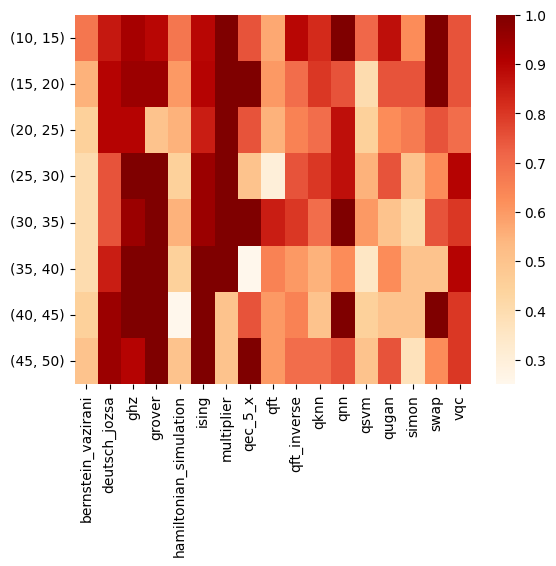

In [148]:
# index: qubit_nums:
# cols: alg_names

alg_names = list(alg2n_qubit2success_rate.keys())
# qubit_nums = list(range(10, 30))
# qubit_nums.sort()
alg_names.sort()

# alg_names, qubit_nums

data = np.zeros((len(bug_num_ranges) , len(alg_names))) # 先index, 后column

for r_i, qubit_num in enumerate(bug_num_ranges):
    for c_i, alg_name in enumerate(alg_names):
        data[r_i][c_i] = alg2n_qubit2success_rate[alg_name][qubit_num]

df = pd.DataFrame(data, index=bug_num_ranges, columns=alg_names)
fig = sns.heatmap(data=df,cmap='OrRd')
fig.get_figure().savefig('success_rate.svg')
print(data)


In [163]:
alg2n_qubit2error_num = defaultdict(lambda: defaultdict(int))
alg2n_qubit2identify_num = defaultdict(lambda: defaultdict(int))

alg_names = set()
qubit_nums = set()
for result in all_results:
    min_qubit_num, max_qubit_num, identify_num, max_step = result['key']
    if max_step == 4:
      
        for alg_name, n_qubit2error_num in result['alg2n_qubit2error_num'].items():
            for n_qubit, error_num in n_qubit2error_num.items():
                # alg2n_qubit2success_num[alg_name][n_qubit] += success_num 
                alg2n_qubit2error_num[alg_name][findRange(n_qubit,bug_num_ranges)] += error_num 
                
            # alg_names.add(alg_name)
            # qubit_nums.add((min_qubit_num,max_qubit_num))

        for alg_name, n_qubit2identify_num in result['alg2n_qubit2identify_num'].items():
            for n_qubit, identify_num in n_qubit2identify_num.items():
                # alg2n_qubit2bug_num[alg_name][n_qubit] += bug_num
                alg2n_qubit2identify_num[alg_name][findRange(n_qubit,bug_num_ranges)] += identify_num  
            
# alg_names = list(alg_names)
# qubit_nums = list(qubit_nums)
# alg_names.sort()
# qubit_nums.sort()
# alg_names, qubit_nums

In [169]:
def combine_error(dict1, dict2, default_value = 1):
    all_values = []
    new_dict = defaultdict(lambda: defaultdict(lambda: default_value))
    for k1, v1 in dict1.items():
        for k2, v2 in v1.items():
            new_dict[k1][k2] = v2 / (dict2[k1][k2] + v2)
            all_values.append(v2 / (dict2[k1][k2] + v2))
    
    return new_dict, np.array(all_values)

In [151]:
alg2n_qubit2error_rate, all_values = combine(alg2n_qubit2error_num, alg2n_qubit2identify_num, 0)
alg2n_qubit2error_rate, np.mean(all_values)

(defaultdict(<function __main__.combine.<locals>.<lambda>()>,
             {'hamiltonian_simulation': defaultdict(<function __main__.combine.<locals>.<lambda>.<locals>.<lambda>()>,
                          {(25, 30): 0.013836477987421384,
                           (30, 35): 0.012962962962962963,
                           None: 0.008138020833333334,
                           (45, 50): 0.003763440860215054,
                           (40, 45): 0.004819277108433735,
                           (20, 25): 0.008914728682170543,
                           (10, 15): 0.005376344086021506,
                           (15, 20): 0.012121212121212121,
                           (35, 40): 0.0073059360730593605}),
              'qknn': defaultdict(<function __main__.combine.<locals>.<lambda>.<locals>.<lambda>()>,
                          {(25, 30): 0.024509803921568627,
                           None: 0.04924242424242424,
                           (45, 50): 0.028954802259887006,
                

In [170]:
alg2n_qubit2error_rate, all_values = combine_error(alg2n_qubit2error_num, alg2n_qubit2success_num, 0)
alg2n_qubit2error_rate, np.mean(all_values)

(defaultdict(<function __main__.combine_error.<locals>.<lambda>()>,
             {'hamiltonian_simulation': defaultdict(<function __main__.combine_error.<locals>.<lambda>.<locals>.<lambda>()>,
                          {(25, 30): 0.8301886792452831,
                           (30, 35): 0.8166666666666667,
                           None: 0.6756756756756757,
                           (45, 50): 0.6774193548387096,
                           (40, 45): 0.8275862068965517,
                           (20, 25): 0.6764705882352942,
                           (10, 15): 0.3448275862068966,
                           (15, 20): 0.6666666666666666,
                           (35, 40): 0.7804878048780488}),
              'qknn': defaultdict(<function __main__.combine_error.<locals>.<lambda>.<locals>.<lambda>()>,
                          {(25, 30): 0.5555555555555556,
                           None: 0.6724137931034483,
                           (45, 50): 0.7454545454545455,
                      

In [166]:
alg2n_qubit2error_num,alg2n_qubit2success_num

(defaultdict(<function __main__.<lambda>()>,
             {'hamiltonian_simulation': defaultdict(int,
                          {(25, 30): 44,
                           (30, 35): 49,
                           None: 25,
                           (45, 50): 21,
                           (40, 45): 24,
                           (20, 25): 23,
                           (10, 15): 10,
                           (15, 20): 24,
                           (35, 40): 32}),
              'qknn': defaultdict(int,
                          {(25, 30): 20,
                           None: 39,
                           (45, 50): 41,
                           (10, 15): 27,
                           (20, 25): 10,
                           (40, 45): 30,
                           (15, 20): 21,
                           (30, 35): 20,
                           (35, 40): 28}),
              'qsvm': defaultdict(int,
                          {(25, 30): 19,
                           None: 18,
        

array([[0.525     , 0.47826087, 0.33333333, 0.73404255, 0.34482759,
        0.64788732, 0.33333333, 0.53846154, 0.        , 0.375     ,
        0.54      , 0.38461538, 0.23076923, 0.46153846, 0.33333333,
        0.55555556, 0.53333333],
       [0.54166667, 0.53846154, 0.20833333, 0.71212121, 0.66666667,
        0.81052632, 0.2       , 0.63636364, 0.        , 0.33333333,
        0.56756757, 0.5       , 0.38461538, 0.57142857, 0.25      ,
        0.33333333, 0.66666667],
       [0.59090909, 0.52631579, 0.        , 0.81818182, 0.67647059,
        0.84821429, 0.2       , 0.66666667, 0.        , 0.43478261,
        0.41666667, 0.5625    , 0.55      , 0.16666667, 0.46666667,
        0.6       , 0.825     ],
       [0.75757576, 0.70588235, 0.23076923, 0.        , 0.83018868,
        0.8442623 , 0.2       , 0.9       , 0.14285714, 0.4       ,
        0.55555556, 0.5625    , 0.63333333, 0.5       , 0.6       ,
        0.64285714, 0.86363636],
       [0.72413793, 0.625     , 0.13636364, 0.      

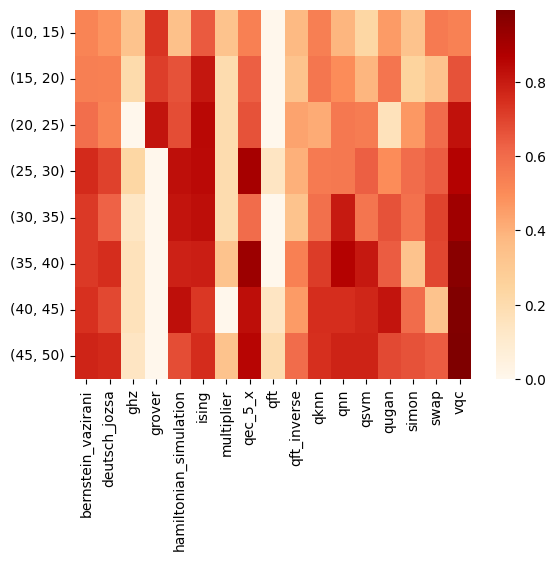

In [171]:
# index: qubit_nums:
# cols: alg_names

alg_names = list(alg2n_qubit2error_rate.keys())
# qubit_nums = list(range(10, 30))
# qubit_nums.sort()
alg_names.sort()

# alg_names, qubit_nums

data = np.zeros((len(bug_num_ranges) , len(alg_names))) # 先index, 后column 

for r_i, qubit_num in enumerate(bug_num_ranges):
    for c_i, alg_name in enumerate(alg_names):
        data[r_i][c_i] = alg2n_qubit2error_rate[alg_name][qubit_num]

# cbar
df = pd.DataFrame(data, index=bug_num_ranges, columns=alg_names)
fig = sns.heatmap(data=df,cmap='OrRd')
fig.get_figure().savefig('error_rate.svg')
data

In [154]:
alg2n_qubit2success_num = defaultdict(lambda: defaultdict(int))
alg2n_qubit2bug_num = defaultdict(lambda: defaultdict(int))

for result in all_results:
    min_qubit_num, max_qubit_num, bug_num_index, max_step = result['key']
    if max_step == 4:
    
        for alg_name, n_qubit2success_num in result['alg2n_qubit2success_num'].items():
            for n_qubit, success_num in n_qubit2success_num.items():
                # alg2n_qubit2success_num[alg_name][n_qubit] += success_num 
                alg2n_qubit2success_num[alg_name][bug_num_index] += success_num 
                
    
        for alg_name, n_qubit2bug_num in result['alg2n_qubit2bug_num'].items():
            for n_qubit, bug_num in n_qubit2bug_num.items():
                # alg2n_qubit2bug_num[alg_name][n_qubit] += bug_num
                alg2n_qubit2bug_num[alg_name][bug_num_index] += bug_num  
            
alg2n_qubit2success_rate, all_values = combine(alg2n_qubit2success_num, alg2n_qubit2bug_num)
alg2n_qubit2success_rate, np.mean(all_values)

(defaultdict(<function __main__.combine.<locals>.<lambda>()>,
             {'hamiltonian_simulation': defaultdict(<function __main__.combine.<locals>.<lambda>.<locals>.<lambda>()>,
                          {1: 0.4166666666666667,
                           3: 0.5208333333333334,
                           4: 0.6458333333333334,
                           2: 0.4583333333333333}),
              'qknn': defaultdict(<function __main__.combine.<locals>.<lambda>.<locals>.<lambda>()>,
                          {1: 0.4791666666666667,
                           3: 0.8333333333333334,
                           4: 0.8958333333333334,
                           2: 0.6458333333333334}),
              'qsvm': defaultdict(<function __main__.combine.<locals>.<lambda>.<locals>.<lambda>()>,
                          {1: 0.14583333333333334,
                           3: 0.625,
                           4: 0.7291666666666666,
                           2: 0.5833333333333334}),
              'ising': 

In [155]:
0.6664332399626516,0.7165188869665513,0.7405204728950403

(0.6664332399626516, 0.7165188869665513, 0.7405204728950403)

[[0.27083333 0.375      0.6875     0.8125    ]
 [0.70833333 0.89583333 0.9375     0.95833333]
 [0.89583333 0.91666667 0.97916667 1.        ]
 [0.82352941 0.88235294 0.94117647 1.        ]
 [0.41666667 0.45833333 0.52083333 0.64583333]
 [0.79166667 0.95833333 1.         1.        ]
 [0.8        0.9        0.9        1.        ]
 [0.4        0.7        0.9        0.9       ]
 [0.35416667 0.52083333 0.66666667 0.75      ]
 [0.39583333 0.625      0.9375     0.97916667]
 [0.47916667 0.64583333 0.83333333 0.89583333]
 [0.625      0.8125     0.9375     1.        ]
 [0.14583333 0.58333333 0.625      0.72916667]
 [0.25       0.6875     0.9375     1.        ]
 [0.125      0.45833333 0.875      0.79166667]
 [0.5        0.75       0.875      1.        ]
 [0.39583333 0.85416667 0.95833333 0.97916667]]


array([0.49280565, 0.70729527, 0.85364764, 0.90833333])

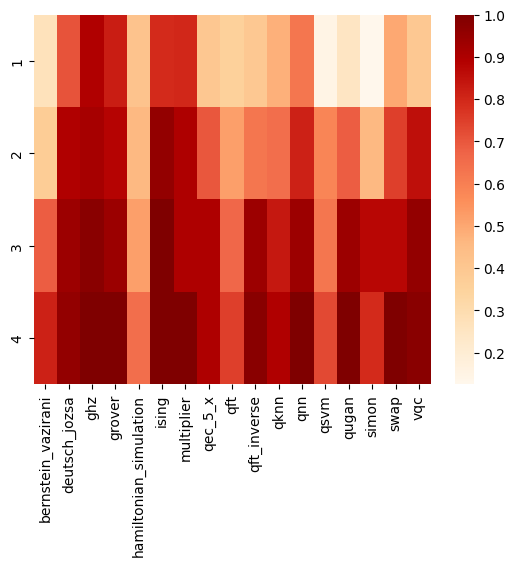

In [156]:
# index: qubit_nums:
# cols: alg_names

alg_names = list(alg2n_qubit2success_rate.keys())
# qubit_nums = list(range(10, 30))
# qubit_nums.sort()
alg_names.sort()

# alg_names, qubit_nums
bug_num_ranges = [1,2,3,4]
data = np.zeros((len(bug_num_ranges) , len(alg_names))) # 先index, 后column

for r_i, qubit_num in enumerate(bug_num_ranges):
    for c_i, alg_name in enumerate(alg_names):
        data[r_i][c_i] = alg2n_qubit2success_rate[alg_name][qubit_num]

df = pd.DataFrame(data, index=bug_num_ranges, columns=alg_names)
fig = sns.heatmap(data=df,cmap='OrRd')
fig.get_figure().savefig('success_rate_bug_num.svg')
print(data.T)
data.mean(axis =1)